In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
#get the data into dataframe
dataset =  pd.read_csv('candy_choices.csv')
dataset

,gender,candy,flavor,age,ethnicity,shirt color
0,M,reeses,NaN,26.0,white,red
1,M,kitkat,NaN,32.0,black,green
2,F,airhead,double mystery,26.0,mixed,white
3,M,starburst,red,26.0,white,red
4,F,reeses,NaN,31.0,white,black
...,...,...,...,...,...,...
169,F,reeses,NaN,25.0,white,black
170,M,reeses,NaN,19.0,white,red
171,M,reeses,NaN,19.0,white,red
172,M,reeses,NaN,19.0,white,red


In [3]:
def get_time_between_selections(dataset):
    dict_time_between_selections =  {}
    list_time_between_selections = [] 
    
    for (index, row) in dataset.iterrows():
        if dict_time_between_selections.__contains__(row.candy):           
            time_between_selections  = index - dict_time_between_selections[row.candy] - 1           
            list_time_between_selections.append((index, row.candy , time_between_selections))
            
            dict_time_between_selections.update({row.candy : index})           
        else:
            dict_time_between_selections.update({row.candy : index})
       
    return list_time_between_selections

In [4]:
#get a list of tuplas (index, "candy", time_between_selections)
list_time_between_selections = get_time_between_selections(dataset)

In [5]:
def plt_time_between_selections (candy, color):
    list_time_per_candy = []
    for item in list_time_between_selections:
        if (item[1] == candy):
            list_time_per_candy.append(item[2])    
    
    plt.plot(list_time_per_candy, color = color, label = candy)
    
    # Add a legend and label the axes
    plt.legend(frameon=True, framealpha=0.7, loc=0, prop={'size':14})
    plt.xlabel("Selection number", fontsize=14)
    plt.ylabel("Interselection time", fontsize=14)

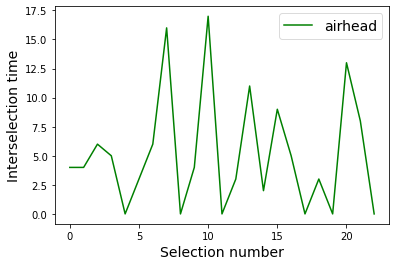

In [6]:
plt_time_between_selections('airhead', 'green')

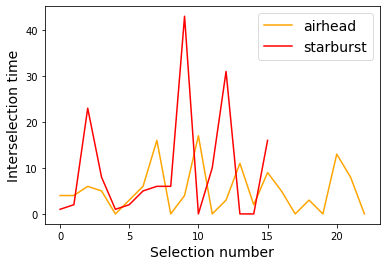

In [7]:
plt_time_between_selections('airhead', 'orange')
plt_time_between_selections('starburst', 'red')

In [8]:
def plt_time_between_selections_ordered (candy, color):
    list_time_per_candy = []
    selection_number  = []
    for item in list_time_between_selections:
        if (item[1] == candy):
            list_time_per_candy.append(item[2])
            selection_number.append(item[0])
    
    plt.plot(selection_number, list_time_per_candy, color = color, label = candy)
    
    # Add a legend and label the axes
    plt.legend(frameon=True, framealpha=0.7, loc=0, prop={'size':14})
    plt.xlabel("Selection number", fontsize=14)
    plt.ylabel("Interselection time", fontsize=14)

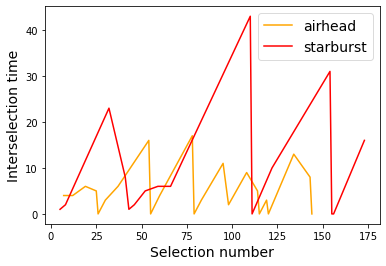

In [9]:
plt_time_between_selections_ordered('airhead', 'orange')
plt_time_between_selections_ordered('starburst', 'red')

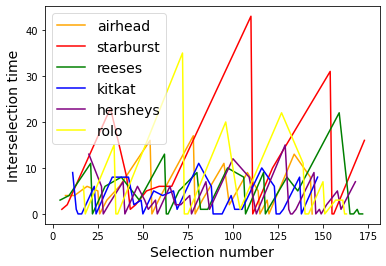

In [10]:
plt_time_between_selections_ordered('airhead', 'orange')
plt_time_between_selections_ordered('starburst', 'red')
plt_time_between_selections_ordered('reeses', 'green')
plt_time_between_selections_ordered('kitkat', 'blue')
plt_time_between_selections_ordered('hersheys', 'purple')
plt_time_between_selections_ordered('rolo', 'yellow')

Building a Model

In [12]:
# building a matrix of time between selections

def get_event_selections(dataset):
    candys = dataset.candy.unique()
    dict_time_between_selections =  {}
    events = {key: [] for key in candys}
    for (index, row) in dataset.iterrows():
        
        if dict_time_between_selections.__contains__(row.candy):                   
            time_between_selections  = index - dict_time_between_selections[row.candy] - 1
            for candy in candys:
                if candy == row.candy:
                    events[candy].append(time_between_selections)
                else:
                    events[candy].append(events.get(candy)[-1])
                    
            dict_time_between_selections.update({row.candy : index})           
        else:
            dict_time_between_selections.update({row.candy : index})
            for candy in candys:
                if index == 0 :
                    events[candy].append(0)
                else:
                    events[candy].append(events[candy][-1])
       
    return events

In [13]:
df_events = pd.DataFrame(get_event_selections(dataset))
df_events[:15]

,reeses,kitkat,airhead,starburst,hersheys,rolo
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,3,0,0,0,0,0
5,3,0,0,1,0,0
6,3,0,0,1,0,0
7,3,0,4,1,0,0
8,3,0,4,2,0,0
9,4,0,4,2,0,0


In [14]:
# train and test set
from sklearn.model_selection import train_test_split

X = df_events[['reeses', 'kitkat', 'airhead', 'hersheys', 'rolo']]
y = df_events[['starburst']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=1)

In [15]:
X_train =  X_train.sort_index()
X_test = X_test.sort_index()
y_train =y_train.sort_index()
y_test = y_test.sort_index()

In [16]:
 # Linear Regression Model with all features
from sklearn.linear_model import LinearRegression

model_regressor = LinearRegression()
model_regressor.fit(X_train.values, y_train.values)

LinearRegression()

In [17]:
list(zip(X_train.columns.to_list(), (model_regressor.coef_).tolist()[0]))

[('reeses', 0.08870367411740868),
 ('kitkat', 0.19912544890630826),
 ('airhead', 0.2205459790321262),
 ('hersheys', -0.027477509173943253),
 ('rolo', 0.15409258784042418)]

In [18]:
y_pred = model_regressor.predict(X_train.values)

In [19]:
# Print mean squared error and R^2 on the training set
print(np.mean(y_pred - y_train.values) ** 2)
print(model_regressor.score(X_train.values, y_train.values))

3.2199646517123084e-31
0.07755244164295294


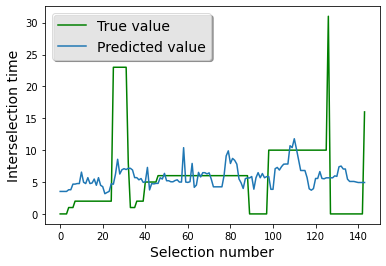

In [20]:
# Plot predicted and true interarrival times on the training set

plt.plot(y_train.values, color="green", label="True value")
plt.plot(y_pred, label="Predicted value")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Interselection time", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})

In [21]:
y_pred_test = model_regressor.predict(X_test.values)

In [22]:
# Print mean squared error and R^2 on the test set
print(np.mean(y_pred_test - y_test.values) ** 2)
print(model_regressor.score(X_test.values, y_test.values))

1.949175957275193
0.020838335072462466


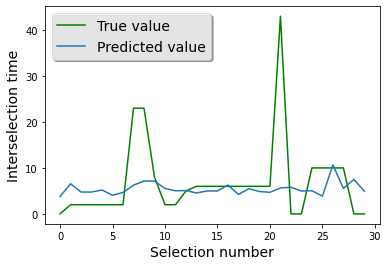

In [23]:
# Plot predicted and true interarrival times on the test set

plt.plot(y_test.values, color="green", label="True value")
plt.plot(y_pred_test, label="Predicted value")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Interselection time", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [25]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return  fs

In [26]:
fs = select_features(X_train.values, y_train.values.reshape(y_train.values.size), X_test.values)

# what are scores for the features
list(zip(X_train.columns.to_list(), fs.scores_))

[('reeses', 2.143631652213571),
 ('kitkat', 0.43349409550835977),
 ('airhead', 2.5740246047605337),
 ('hersheys', 0.09158582665242891),
 ('rolo', 6.404058319510505)]

In [27]:
# Linear Regression Model with features based on the score
 
X = df_events[['reeses', 'airhead',  'rolo']]
y = df_events[['starburst']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=1)

In [28]:
X_train =  X_train.sort_index()
X_test = X_test.sort_index()
y_train =y_train.sort_index()
y_test = y_test.sort_index()

In [29]:
model_regressor = LinearRegression()
model_regressor.fit(X_train.values, y_train.values)

LinearRegression()

In [30]:
list(zip(X_train.columns.to_list(), (model_regressor.coef_).tolist()[0]))

[('reeses', 0.11363080516173477),
 ('airhead', 0.16259089799549387),
 ('rolo', 0.13402341666794002)]

In [31]:
y_pred = model_regressor.predict(X_train.values)

In [32]:
# Print mean squared error and R^2 on the training set
print(np.mean(y_pred - y_train.values) ** 2)
print(model_regressor.score(X_train.values, y_train.values))

2.5717108985793015e-32
0.06125343774538694


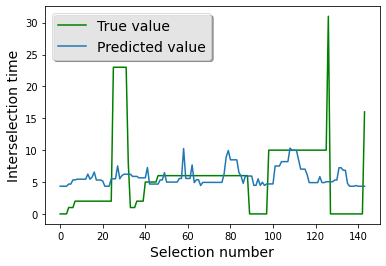

In [33]:
# Plot predicted and true interarrival times on the training set

plt.plot(y_train.values, color="green", label="True value")
plt.plot(y_pred, label="Predicted value")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Interselection time", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})

In [34]:
y_pred_test = model_regressor.predict(X_test.values)

In [35]:
# Print mean squared error and R^2 on the test set
print(np.mean(y_pred_test - y_test.values) ** 2)
print(model_regressor.score(X_test.values, y_test.values))

1.440038860986721
-0.0022607901002136277


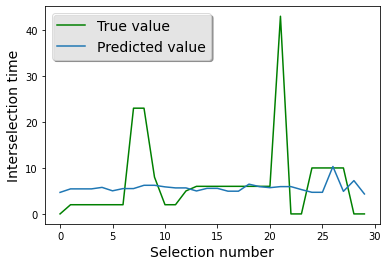

In [36]:
# Plot predicted and true interarrival times on the test set

plt.plot(y_test.values, color="green", label="True value")
plt.plot(y_pred_test, label="Predicted value")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Interselection time", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})